## FoDS Homework 1

Exercise 1.2 & 1.3

In [1]:
# imports
import random
import math

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### data1-1.csv

(array([10., 11., 11.,  8.,  5., 12., 10., 10.,  8., 15.]),
 array([-1.   , -0.402,  0.196,  0.794,  1.392,  1.99 ,  2.588,  3.186,
         3.784,  4.382,  4.98 ]),
 <BarContainer object of 10 artists>)

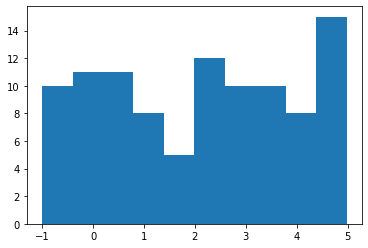

In [2]:
# get data
data = pd.read_csv("data1-1.csv", sep="\t")

# plot histogram of x values
plt.hist(data["x"])

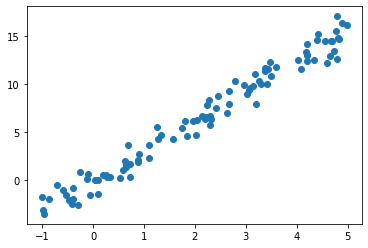

In [3]:
# plot scatterplot
plt.scatter(data["x"], data["y"])

The distribution of x values seems uniform including noise.

A linear relationship between x and y is evident meaning a linear regression model should lend itself well to describing the data.

$ f(x) = mx + b $

To determine the model parameters, we could either minimise the mean squared error (MSE) using gradient descent

$ MSE = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 $

or compute $\theta$ using the Normal-Equation

$\hat{\theta} = (X^T \cdot X)^{-1} \cdot X^T \cdot y$

In [4]:
# use 90% of data for training, 10% for validation
n = data["x"].shape[0]

n_train = int(0.9*n)
n_test = int(0.1*n)

assert(n_train + n_test == n)

# shuffle data
data = data.sample(frac=1)

X_train, y_train = data["x"].iloc[:n_train], data["y"].iloc[:n_train]
X_test, y_test = data["x"].iloc[n_train:], data["y"].iloc[n_train:]

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(90,) (90,) (10,) (10,)


In [5]:
X = X_train.to_numpy().reshape(n_train, 1)
y = y_train.to_numpy().reshape(n_train, 1)

theta_hat = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
theta_hat

array([[3.11623218]])

Therefore m could be about 3.13.

Looking at the scatter plot, we guess the bias to be -5.

Therefore our parameterised model is

$\hat{f}(x) = 3.13 \cdot x - 5 $

In [6]:
def pred(x):
    return 3.13 * x - 5

# apply prediction for test set
y_pred = X_test.apply(pred)

# compute mse
mse = 1 / y_pred.shape[0] * (((y_pred - y_test)**2).sum())
mse

21.175439583000003

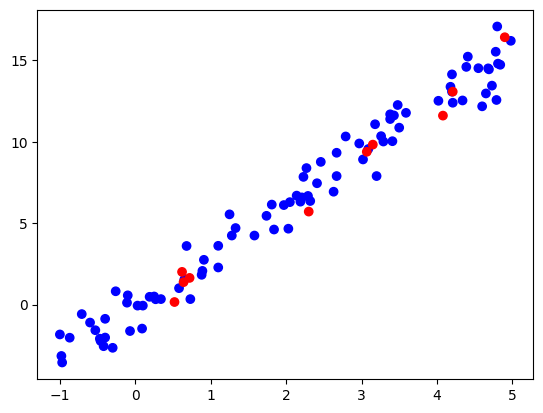

In [7]:
# plot predictions for verification
X = pd.concat([X_train, X_test])
y = pd.concat([y_train, y_test])

colourmap = ["blue"] * n_train + ["red"] * n_test
plt.scatter(X, y, color=colourmap)

#### data1-2.csv

(array([1., 0., 3., 1., 1., 1., 1., 1., 0., 1.]),
 array([-1.15 , -0.836, -0.522, -0.208,  0.106,  0.42 ,  0.734,  1.048,
         1.362,  1.676,  1.99 ]),
 <BarContainer object of 10 artists>)

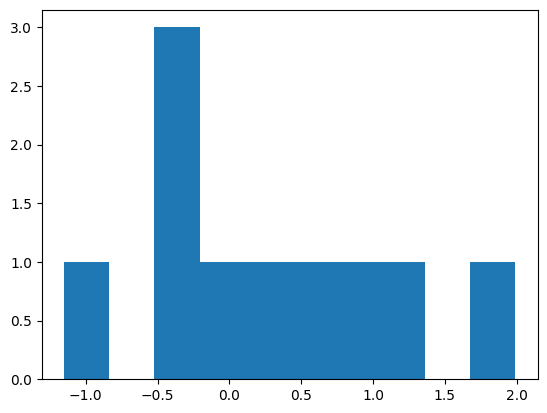

In [8]:
# get data
data = pd.read_csv("data1-2.csv", sep="\t")

# plot histogram of x values
plt.hist(data["x"])

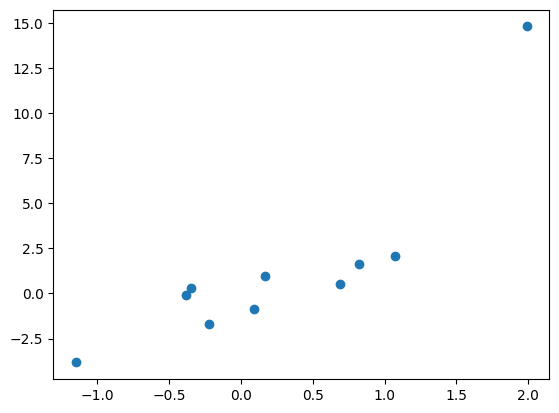

In [9]:
# plot scatterplot
plt.scatter(data["x"], data["y"])

Given the low amount of data points finding a final, conclusive model will prove challenging. 

It seems as if a linear model loosely fits the data. If we exclude the outlier located in the top right corner of the scatterplot a linear model would fit even better.

Therefore we estimate model parameters applying the same method we already applied to data1-1.csv.

In [10]:
# use 80% of data for training, 20% for validation
n = data["x"].shape[0]

n_train = int(0.8*n)
n_test = int(0.2*n)

assert(n_train + n_test == n)

# shuffle data
data = data.sample(frac=1)

X_train, y_train = data["x"].iloc[:n_train], data["y"].iloc[:n_train]
X_test, y_test = data["x"].iloc[n_train:], data["y"].iloc[n_train:]

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(8,) (8,) (2,) (2,)


In [11]:
X = X_train.to_numpy().reshape(n_train, 1)
y = y_train.to_numpy().reshape(n_train, 1)

theta_hat = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
theta_hat

array([[5.11211969]])

In [12]:
def pred(x):
    return 4.81 * x - 3

# apply prediction for test set
y_pred = X_test.apply(pred)

# compute mse
mse = 1 / y_pred.shape[0] * (((y_pred - y_test)**2).sum())
mse

16.052121769999996

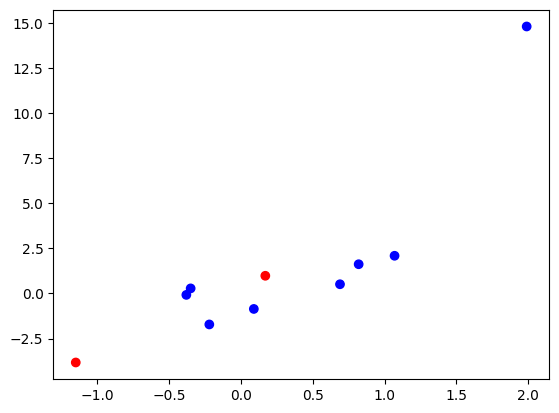

In [13]:
# plot predictions for verification
X = pd.concat([X_train, X_test])
y = pd.concat([y_train, y_test])

colourmap = ["blue"] * n_train + ["red"] * n_test
plt.scatter(X, y, color=colourmap)

#### data1-3.csv

(array([ 4.,  3., 10., 13., 19., 16., 14., 13.,  3.,  3.]),
 array([-2.25 , -1.802, -1.354, -0.906, -0.458, -0.01 ,  0.438,  0.886,
         1.334,  1.782,  2.23 ]),
 <BarContainer object of 10 artists>)

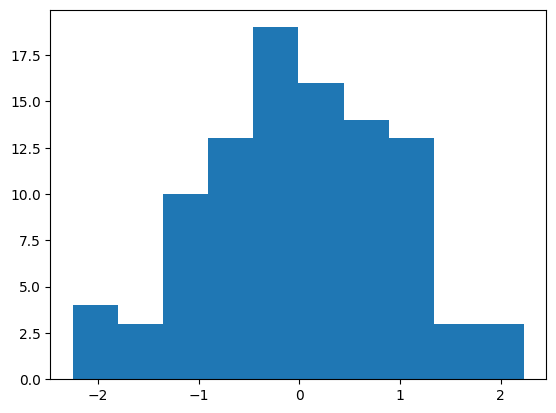

In [14]:
# get data
data = pd.read_csv("data1-3.csv", sep="\t")

# plot histogram of x values
plt.hist(data["x"])

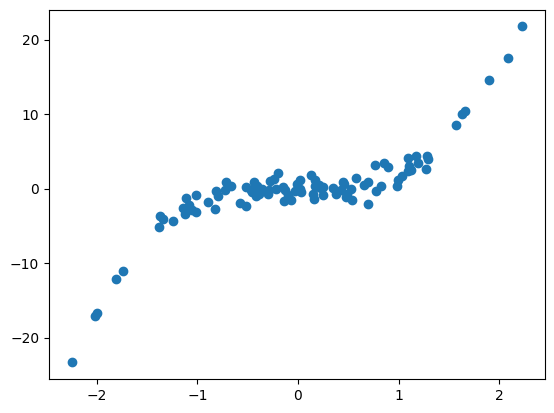

In [15]:
# plot scatterplot
plt.scatter(data["x"], data["y"])

The distribution revealed by the histogramm strongly suggests a normal distribution.

$ f(x) = \frac{1}{\sigma \sqrt{2 \pi}} e^{- \frac{1}{2} (\frac{x-\mu}{\sigma})^2}$

Therefore given the standard deviation $\sigma$ and the expected value $\mu$ we can use the above formula to create a prediction model.

The expected value is computed as follows: 

$ \mu = \frac{1}{n} \sum_{x \in X} x $

The standard deviation is computed as follows:

$ \sigma = \sqrt{E[X - \mu]^2} $



In [16]:
# use 80% of data for training, 20% for validation
n = data["x"].shape[0]

n_train = int(0.8*n)
n_test = int(0.2*n)

assert(n_train + n_test == n)

# shuffle data
data = data.sample(frac=1)

X_train, y_train = data["x"].iloc[:n_train], data["y"].iloc[:n_train]
X_test, y_test = data["x"].iloc[n_train:], data["y"].iloc[n_train:]

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(80,) (80,) (20,) (20,)


In [17]:
# compute expected value
mu = X_train.sum() / n_train

# compute standard deviation
sigma = np.sqrt((1/n_train * ((X_train - mu)**2).sum()))

print(f"Expected value: {mu}")
print(f"Standard deviation: {sigma}")

Expected value: 0.10350000000000001
Standard deviation: 0.927450776995739


Using the computed values and the formula for the normal distribution we predict the remaining test set values.

In [19]:
def pred(x):
    return 1/(sigma * np.sqrt(2 * math.pi)) * math.e**(-0.5 * ((x - mu)/sigma)**2)

In [20]:
# apply prediction for test set
y_pred = X_test.apply(pred)

# compute mse
mse = 1 / y_pred.shape[0] * (((y_pred - y_test)**2).sum())
mse

38.30779643049989

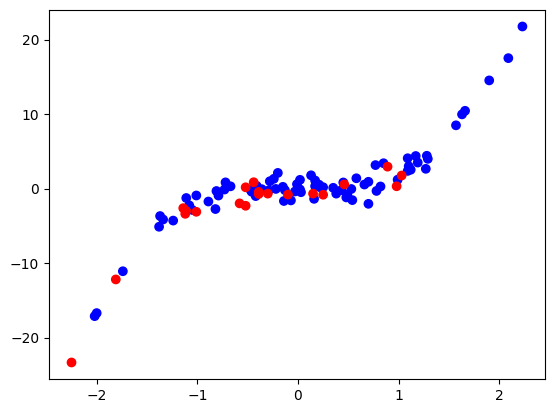

In [21]:
# plot predictions for verification
X = pd.concat([X_train, X_test])
y = pd.concat([y_train, y_test])

colourmap = ["blue"] * n_train + ["red"] * n_test
plt.scatter(X, y, color=colourmap)